# Meal plan optimization

## Problem Statement: 
The AI will optimize a weekly meal plan consisting of breakfast, lunch, and dinner each day. The meals have predefined nutritional values (calories, protein, etc.), and the goal is to maximize total protein while keeping total calories below a specified limit.

## Genetic Algorithm: 
Individuals represent meal plans. Fitness is based on nutrition and calorie limits. The AI evolves plans through crossover and mutation.

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49


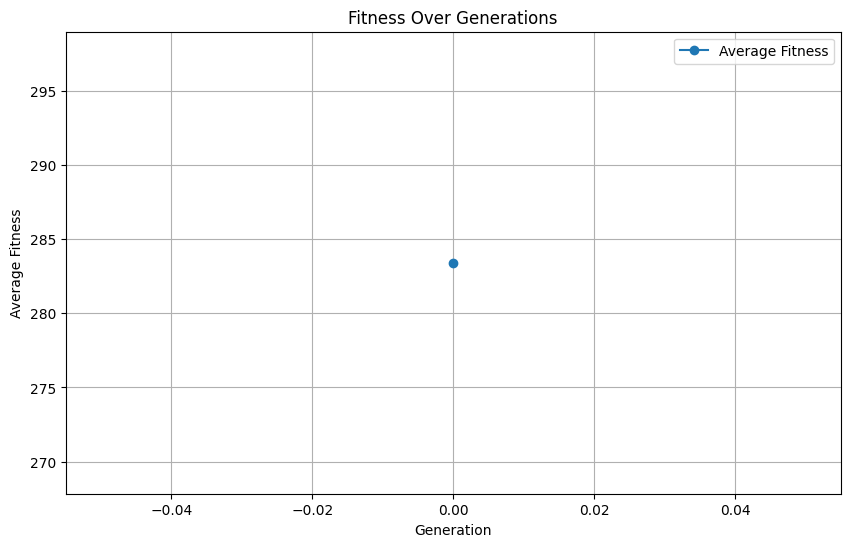

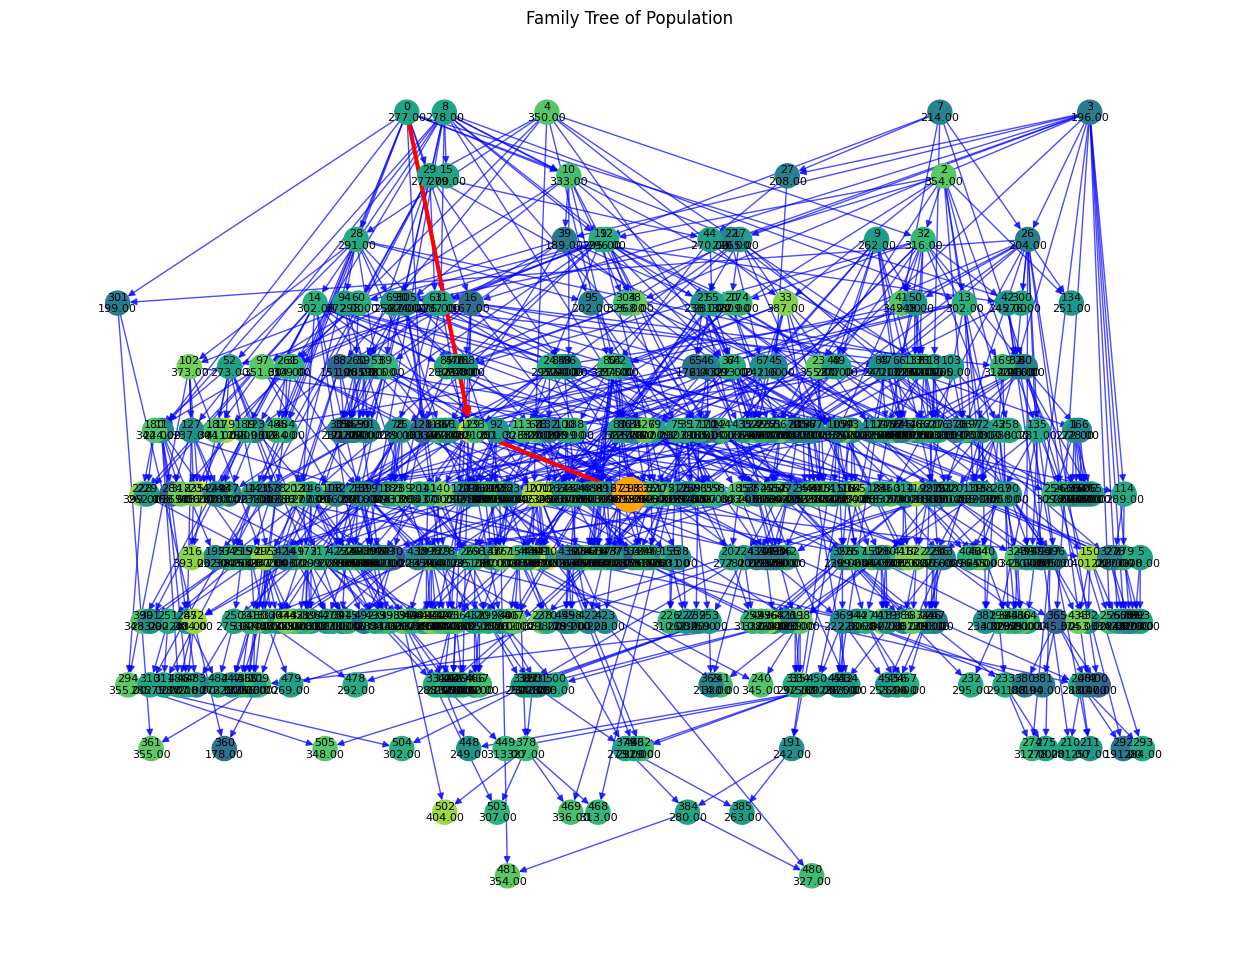


Best Meal Plan:
Day 1:
  Eggs (Calories: 200, Protein: 12)
  Pasta (Calories: 300, Protein: 8)
  Fish (Calories: 350, Protein: 25)
Day 2:
  Chicken Breast (Calories: 400, Protein: 30)
  Oatmeal (Calories: 150, Protein: 5)
  Steak (Calories: 500, Protein: 35)
Day 3:
  Fish (Calories: 350, Protein: 25)
  Steak (Calories: 500, Protein: 35)
  Chicken Breast (Calories: 400, Protein: 30)
Day 4:
  Steak (Calories: 500, Protein: 35)
  Pasta (Calories: 300, Protein: 8)
  Fish (Calories: 350, Protein: 25)
Day 5:
  Pasta (Calories: 300, Protein: 8)
  Steak (Calories: 500, Protein: 35)
  Salad (Calories: 250, Protein: 3)
Day 6:
  Steak (Calories: 500, Protein: 35)
  Fish (Calories: 350, Protein: 25)
  Fruit (Calories: 100, Protein: 1)
Day 7:
  Chicken Breast (Calories: 400, Protein: 30)
  Chicken Breast (Calories: 400, Protein: 30)
  Steak (Calories: 500, Protein: 35)


In [4]:
import random
from geneticanalyzer import GeneticAnalyzer

# Meal dataset: (Meal Name, Calories, Protein)
meals = [
    ("Oatmeal", 150, 5), 
    ("Eggs", 200, 12), 
    ("Salad", 250, 3), 
    ("Chicken Breast", 400, 30), 
    ("Fish", 350, 25), 
    ("Steak", 500, 35),
    ("Fruit", 100, 1),
    ("Pasta", 300, 8),
    ("Soup", 150, 4)
]

# Parameters
calorie_limit = 2000  # Daily calorie limit
meal_count = 21  # 7 days * 3 meals/day
population_size = 10
generations = 50
mutation_rate = 0.1

# GeneticAnalyzer setup
analyzer = GeneticAnalyzer()

def fitness_function(individual):
    """Calculate fitness as total protein while staying within calorie limit."""
    total_calories = sum(meals[meal][1] for meal in individual)
    total_protein = sum(meals[meal][2] for meal in individual)
    if total_calories > calorie_limit * 7:  # Weekly calorie limit
        return 0  # Penalize plans exceeding the limit
    return total_protein

def create_individual():
    """Create a random meal plan."""
    return [random.randint(0, len(meals) - 1) for _ in range(meal_count)]

def mutate(individual, mutation_rate=0.1):
    """Mutate an individual by swapping a random meal."""
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(0, len(meals) - 1)
    return individual

def crossover(parent1, parent2):
    """Perform crossover by combining segments of two parents."""
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def genetic_algorithm():
    # Initialize population
    population = [create_individual() for _ in range(population_size)]
    for individual in population:
        fitness = fitness_function(individual)
        analyzer.add_individual({"genes": individual, "fitness": fitness}, generation=0)

    # Evolve generations
    for generation in range(generations):
        print(f"Generation {generation}")
        new_population = []

        # Selection: keep the best individual (elitism)
        sorted_population = sorted(analyzer.population, key=lambda x: x["fitness"], reverse=True)
        best_individual = sorted_population[0]
        new_population.append(best_individual["genes"])

        # Generate new population via crossover and mutation
        while len(new_population) < population_size:
            parent1 = random.choice(sorted_population)
            parent2 = random.choice(sorted_population)
            child1_genes, child2_genes = crossover(parent1["genes"], parent2["genes"])

            child1_genes = mutate(child1_genes, mutation_rate)
            child2_genes = mutate(child2_genes, mutation_rate)

            child1_fitness = fitness_function(child1_genes)
            child2_fitness = fitness_function(child2_genes)

            analyzer.add_individual({"genes": child1_genes, "fitness": child1_fitness},
                                     parents=[analyzer.population.index(parent1), analyzer.population.index(parent2)],
                                     mutation_info="Mutation Applied",
                                     generation=generation)

            analyzer.add_individual({"genes": child2_genes, "fitness": child2_fitness},
                                     parents=[analyzer.population.index(parent1), analyzer.population.index(parent2)],
                                     mutation_info="Mutation Applied",
                                     generation=generation)

            new_population.append(child1_genes)
            new_population.append(child2_genes)

        # Update population
        population = new_population
        analyzer.generation += 1

    # Final analysis
    analyzer.plot_fitness_over_generations()
    best_individual_id = analyzer.population.index(best_individual)
    analyzer.visualize_tree(highlight_best=best_individual_id, layout="dot")

    # Print the best meal plan
    print("\nBest Meal Plan:")
    for day in range(7):
        print(f"Day {day + 1}:")
        for meal in range(3):
            meal_index = best_individual["genes"][day * 3 + meal]
            print(f"  {meals[meal_index][0]} (Calories: {meals[meal_index][1]}, Protein: {meals[meal_index][2]})")

genetic_algorithm()
